[Reference](https://medium.com/@francescofranco_39234/synthetic-data-overcoming-the-limitations-of-real-world-datasets-in-machine-learning-ae95329d6063)

# Basic Distributions

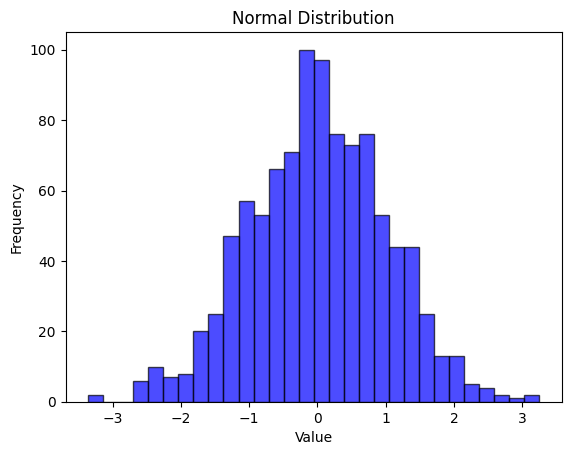

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of data with normal distrubution
mu, sigma = 0, 1  # Average and standard deviation
data_normal = np.random.normal(mu, sigma, 1000)

# Visualizzazione
plt.hist(data_normal, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Monte Carlo Sampling

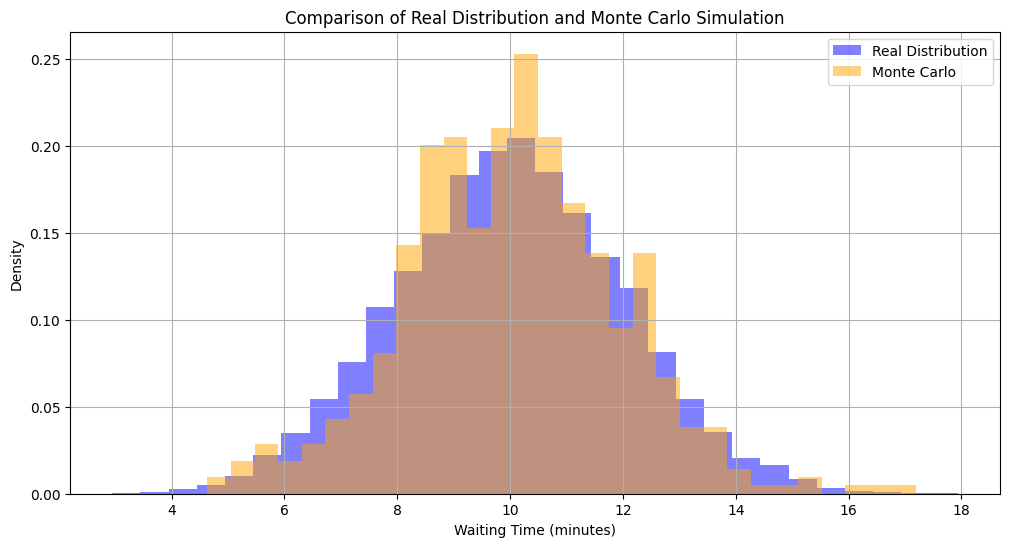

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the real distribution (waiting times)
real_mu = 10  # Average
real_sigma = 2  # Standard Deviation
n_real_samples = 10000  # Number of real data (samples)

# Generation of real data (observed distribution)
real_data = np.random.normal(real_mu, real_sigma, n_real_samples)

# Monte Carlo: progressive samples for approssimating the real distribution
n_monte_carlo_samples = 500  # Max number of Monte Carlo samples
monte_carlo_data = np.random.normal(real_mu, real_sigma, n_monte_carlo_samples)

# Creating a graph to compare real distribution and Monte Carlo simulation
plt.figure(figsize=(12, 6))

# Real distribution
plt.hist(real_data, bins=30, alpha=0.5, color='blue', label='Real Distribution', density=True)

# Monte Carlo Distribution
plt.hist(monte_carlo_data, bins=30, alpha=0.5, color='orange', label='Monte Carlo', density=True)

plt.title("Comparison of Real Distribution and Monte Carlo Simulation")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Conditional Distributions

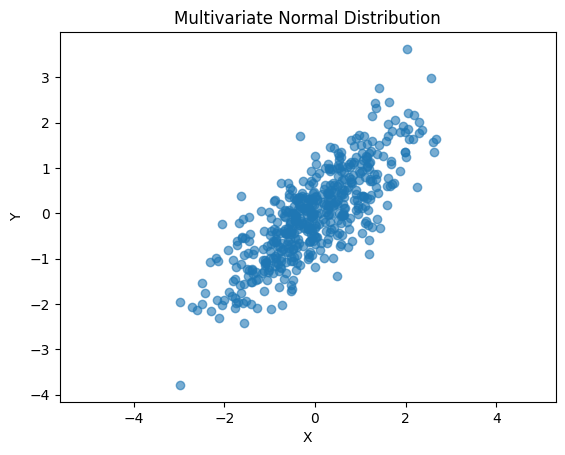

In [3]:
mean = [0, 0]  # Average for X and Y
covariance = [[1, 0.8], [0.8, 1]]  # Matrix of covariance
data_multivariate = np.random.multivariate_normal(mean, covariance, 500)

# Visualizzazione
plt.scatter(data_multivariate[:, 0], data_multivariate[:, 1], alpha=0.6)
plt.title('Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

# Complete Example: Data Generation with Specific Relationships

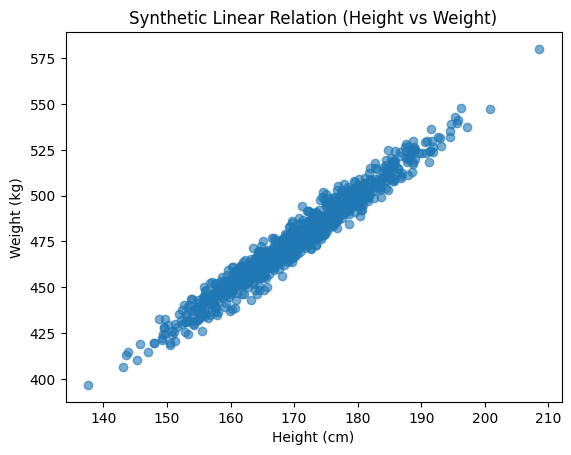

In [4]:
# Parameters
np.random.seed(42)
n_samples = 1000
slope = 2.5  # Slope of the linear relation
intercept = 50  # Intercept
noise_level = 5  # Noise level

# Data Generation
heights = np.random.normal(170, 10, n_samples)  # Height with normal distribution
weights = slope * heights + intercept + np.random.normal(0, noise_level, n_samples)

# Visualization
plt.scatter(heights, weights, alpha=0.6)
plt.title('Synthetic Linear Relation (Height vs Weight)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Data generation with traditional machine learning methods

## Gaussian Mixture Models

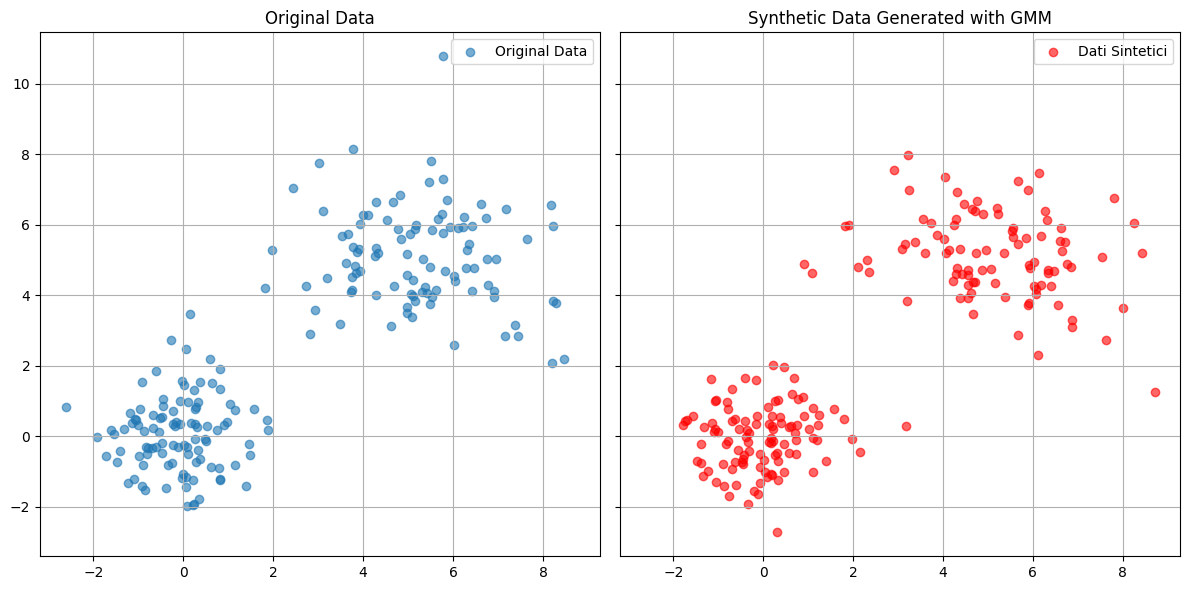

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Orginal data: two principal clusters
np.random.seed(42)
data_original = np.concatenate([
    np.random.normal(loc=0, scale=1, size=(100, 2)),
    np.random.normal(loc=5, scale=1.5, size=(100, 2))
])

# Creation of GMM model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_original)

# Generation of new synthetic data
data_sintetici = gmm.sample(200)[0]

# Side by Side Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Graph of original data
axes[0].scatter(data_original[:, 0], data_original[:, 1], alpha=0.6, label="Original Data")
axes[0].legend()
axes[0].set_title("Original Data")
axes[0].grid(True)

# Graph of synthetic data
axes[1].scatter(data_sintetici[:, 0], data_sintetici[:, 1], color='r', alpha=0.6, label="Dati Sintetici")
axes[1].legend()
axes[1].set_title("Synthetic Data Generated with GMM")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Generative decision trees

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Creaion of a simple dataset
np.random.seed(42)
data_original = pd.DataFrame({
    'Feature1': np.random.choice([0, 1], size=100),
    'Feature2': np.random.choice([0, 1], size=100),
    'Label': np.random.choice([0, 1], size=100)
})

# Construction ofthe decision tree
X = data_original[['Feature1', 'Feature2']]
y = data_original['Label']
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Generation of new data
synthetic_data = pd.DataFrame({
    'Feature1': np.random.choice([0, 1], size=100),
    'Feature2': np.random.choice([0, 1], size=100)
})
synthetic_data['Label'] = tree.predict(synthetic_data)

print("Synthetic data generated:\n", synthetic_data.head())


Synthetic data generated:
    Feature1  Feature2  Label
0         0         1      0
1         0         1      0
2         0         0      1
3         1         0      1
4         1         1      0


## Synthetic Data Generation with LLMs (Large Language Models)

### Step 1: Define the prompt

```
"Generate a dataset with 10 rows and 4 columns:\n"
"Job (a string representing a person's job), "
"Age (an integer between 18 and 75), "
"Country (a string representing a country name), "
"and Score (a floating-point number between 0 and 100).\n\n"
"Job | Age | Country | Score\n"


"---------------------------------\n"
"Teacher | 30 | USA | 88.5\n"
"Engineer | 45 | UK | 92.3\n"
"Nurse | 28 | Canada | 75.4\n"
"Artist | 33 | France | 68.9\n"
"Doctor | 50 | Germany | 85.1\n"
```

### Step 2: Use Python to generate the data

In [7]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
import torch
import re

# Load the tokenizer and the hugging face model
model_name = "EleutherAI/gpt-neo-1.3B"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = GPTNeoForCausalLM.from_pretrained(model_name)
model.config.pad_token_id = tokenizer.eos_token_id
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

prompt = (
    "Generate a dataset with 10 rows and 4 columns:\n"
    "Job (a string representing a person's job), "
    "Age (an integer between 18 and 75), "
    "Country (a string representing a country name), "
    "and Score (a floating-point number between 0 and 100).\n\n"
    "Job | Age | Country | Score\n"
    "---------------------------------\n"
    "Teacher | 30 | USA | 88.5\n"
    "Engineer | 45 | UK | 92.3\n"
    "Nurse | 28 | Canada | 75.4\n"
    "Artist | 33 | France | 68.9\n"
    "Doctor | 50 | Germany | 85.1\n"
)

# Encoding the prompt
inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(device)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# Generation of text
output = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=input_ids.shape[1] + 200,
    num_return_sequences=1,
    no_repeat_ngram_size=2,
    do_sample=False,
    temperature=0.7,
    pad_token_id=tokenizer.eos_token_id
)

# Decoding the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

# Extraction ofthe reading pattern
data_pattern = re.compile(
    r"([A-Za-z\s]+)\s*\|\s*(\d{1,2})\s*\|\s*([A-Za-z\s]+)\s*\|\s*(\d{1,3}\.\d+)"
)
matches = data_pattern.findall(generated_text)

print("\nExtracted Data:")
for match in matches:
    print(f"Job: {match[0].strip()}, Age: {match[1]}, Country: {match[2].strip()}, Score: {match[3]}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Generate a dataset with 10 rows and 4 columns:
Job (a string representing a person's job), Age (an integer between 18 and 75), Country (a string representing a country name), and Score (a floating-point number between 0 and 100).

Job | Age | Country | Score
---------------------------------
Teacher | 30 | USA | 88.5
Engineer | 45 | UK | 92.3
Nurse | 28 | Canada | 75.4
Artist | 33 | France | 68.9
Doctor | 50 | Germany | 85.1
Manager | 25 | Spain | 77.8
Salesperson | 35 | Japan | 73.6
Driver | 20 | Australia | 71.2
Clerk | 40 | India | 70.7
Student | 24 | China | 69.0
Baker | 22 | Brazil | 66.75
Maid | 23 | Italy | 65.25
Cook | 21 | Greece | 64.15
Housewife | 26 | Turkey | 63.85
Fisherman | 29 | Russia | 62.65
Porter | 27 | South Africa | 61.45
Sailor | 32 | United States | 60.35
Soldier | 31 | Sweden | 59.05
Police | 34 | Netherlands | 58.95
Fireman/Paramedic | 36 | Belgium | 57.55
Construction worker | 37 | Denmark | 56.40
Electrician | 38 | Norway | 55.10
Mechanic | 39 | Austria | 54

# Data generation with specific structures and relationships

## Managing complex relationships

In [8]:
import numpy as np
import pandas as pd

# Number of observations and categories
n_observations = 100
n_categories = 3

# Total sum for every observation
total_sum = 100

# Generation of casual data
data = np.random.dirichlet(np.ones(n_categories), size=n_observations) * total_sum

# Creation of a DataFrame
df = pd.DataFrame(data, columns=[f"Category_{i+1}" for i in range(n_categories)])
df["Total"] = df.sum(axis=1)

print("Example of dataset generated with fixed sum:")
print(df.head())

Example of dataset generated with fixed sum:
   Category_1  Category_2  Category_3  Total
0   12.730008   17.749211   69.520781  100.0
1   27.607252   13.452004   58.940744  100.0
2   57.483503   24.880235   17.636263  100.0
3    1.803816   16.842692   81.353492  100.0
4    5.064407   24.513064   70.422529  100.0


In [9]:
from scipy.stats import norm

# Dimension of dataset
n_samples = 1000

# Desired correlation matrix
correlation_matrix = np.array([[1.0, 0.8, 0.5], [0.8, 1.0, 0.3],[0.5, 0.3, 1.0]])

# Creation of correlated data
mean = [0, 0, 0]
data = np.random.multivariate_normal(mean, correlation_matrix, size=n_samples)

# Conversione in DataFrame
df_corr = pd.DataFrame(data, columns=["Variable_1", "Variabie_2", "Variable_3"])
print(df_corr.corr())

            Variable_1  Variabie_2  Variable_3
Variable_1    1.000000    0.795801    0.529066
Variabie_2    0.795801    1.000000    0.325663
Variable_3    0.529066    0.325663    1.000000


### Graph-based models

List of connecetions (arcs):
    source  target
0        0       7
1        0       9
2        1       5
3        1       6
4        2       3
5        2       4
6        2       8
7        3       6
8        3       9
9        4       5
10       4       6
11       4       9
12       5       6
13       5       7
14       6       7
15       6       9
16       8       9


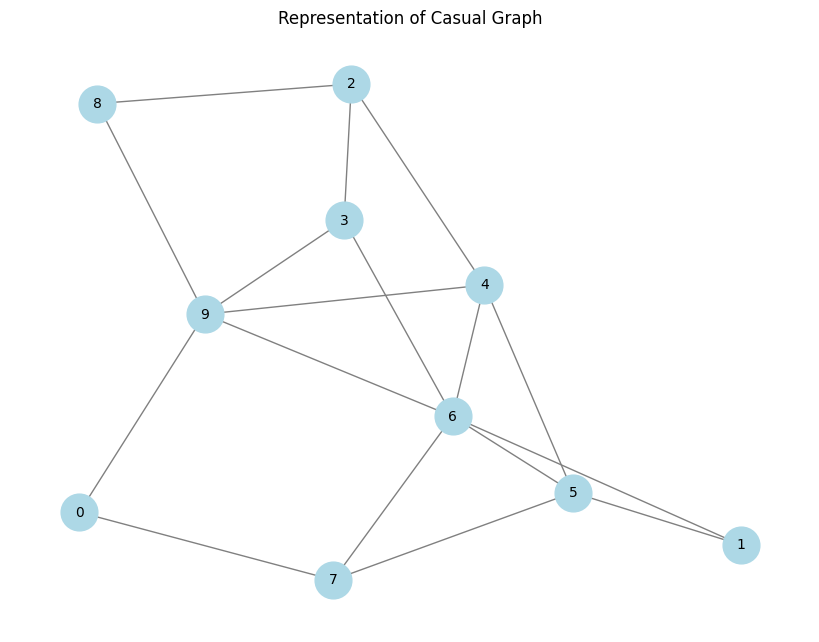

In [10]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Creaion of a casual graph
n_nodes = 10
p_connection = 0.3
graph = nx.erdos_renyi_graph(n_nodes, p_connection)

# Conversion into DataFrame
edges = nx.to_pandas_edgelist(graph)
print("List of connecetions (arcs):")
print(edges)

# Visualization of graph
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
plt.title("Representation of Casual Graph")
plt.show()

### Autoregressive models for time series

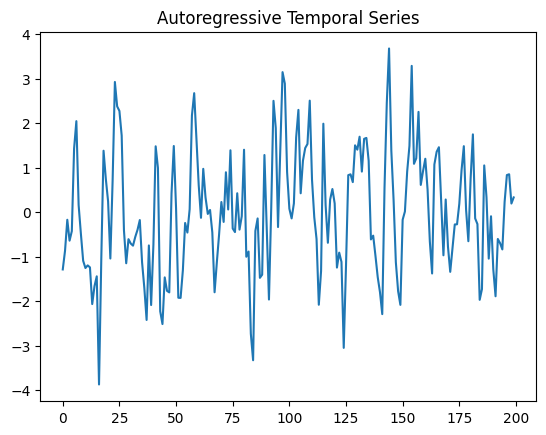

In [11]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Definiion of AR and MA paramaters
ar_params = np.array([1, -0.5])
ma_params = np.array([1, 0.4])
model = ArmaProcess(ar=ar_params, ma=ma_params)

# Generaion of the temporal series
n_points = 200
time_series = model.generate_sample(nsample=n_points)

# Visualization
import matplotlib.pyplot as plt
plt.plot(time_series)
plt.title("Autoregressive Temporal Series")
plt.show()